In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset: 29311 db 128 dimenziós face embedding, target: sex (bool)
DATA_PATH = './data/celebA_df.pickle'

df = pd.read_pickle(DATA_PATH)
df = df.drop(columns='target')
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128
0,-0.136538,0.119699,0.012935,-0.015255,-0.038290,-0.023700,-0.109142,-0.088222,0.083038,-0.055855,...,0.115705,0.066765,0.040396,-0.090324,-0.215710,-0.113152,0.128511,-0.038474,0.075556,-0.034789
1,-0.111129,0.146387,0.015807,0.005980,-0.032194,-0.052961,-0.103212,-0.121766,0.052310,-0.080606,...,0.140794,0.074792,0.062378,-0.077527,-0.197379,-0.106438,0.115229,-0.048250,0.111355,-0.014406
2,-0.093799,0.087028,0.006904,-0.006101,-0.089178,-0.013156,-0.073215,-0.072142,0.153696,-0.049446,...,0.073413,0.063659,-0.007053,-0.027274,-0.169297,-0.062935,0.128955,-0.041391,0.084037,-0.042143
3,-0.108978,0.141567,0.015231,-0.016277,-0.034977,-0.013927,-0.106796,-0.071537,0.135693,-0.034827,...,0.123870,0.086840,0.000106,-0.112450,-0.179551,-0.075124,0.141613,-0.045592,0.073997,-0.033186
4,-0.115908,0.127805,0.033908,-0.035226,-0.052774,-0.055666,-0.083090,-0.120459,0.064228,-0.053043,...,0.138766,0.017301,0.065158,-0.090704,-0.216072,-0.043005,0.136302,-0.082183,0.112824,-0.029111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29306,-0.122433,0.008474,0.024764,-0.099294,-0.062026,0.107217,-0.032527,-0.001603,0.187915,-0.125766,...,0.142953,0.079684,-0.005192,-0.061482,-0.164056,-0.115090,-0.015649,-0.011587,0.060190,-0.048973
29307,-0.146731,0.090615,-0.001504,-0.054266,-0.034171,0.080240,-0.098976,-0.072755,0.161971,-0.079367,...,0.183449,0.064161,-0.022162,-0.082508,-0.121875,-0.092008,-0.031982,0.009459,0.084392,-0.016728
29308,-0.169938,0.004294,0.080174,-0.080741,0.002057,0.005493,-0.044140,-0.033532,0.209367,-0.169952,...,0.154096,0.026146,0.028406,-0.080997,-0.145516,-0.041527,-0.016038,-0.018185,0.064589,-0.024755
29309,-0.127252,0.059775,0.005747,-0.079134,-0.023635,0.081307,-0.056438,-0.046824,0.199757,-0.074625,...,0.156822,0.036591,0.014358,-0.075650,-0.125214,-0.083617,-0.020430,-0.012069,0.050293,-0.050344


In [3]:
# korrelációs táblázat abszolút értékekkel (128 x 128 DataFrame)
corr = df.corr(method='pearson').abs()  
#corr = df.corr(method='spearman').abs()
corr.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128
f1,1.000000,0.122963,0.067486,0.042554,0.137613,0.099482,0.029066,0.013863,0.091039,0.044463,...,0.143697,0.043615,0.061663,0.029135,0.229059,0.013558,0.046829,0.131556,0.134103,0.118758
f2,0.122963,1.000000,0.080135,0.097905,0.151177,0.313212,0.222295,0.001285,0.007286,0.218532,...,0.255786,0.015360,0.119163,0.014622,0.192517,0.184902,0.047469,0.093075,0.029979,0.007537
f3,0.067486,0.080135,1.000000,0.141735,0.113172,0.033371,0.084701,0.008936,0.055465,0.081807,...,0.002271,0.115373,0.014265,0.075179,0.121923,0.003925,0.140064,0.148512,0.116472,0.237129
f4,0.042554,0.097905,0.141735,1.000000,0.139161,0.079301,0.103257,0.058774,0.284394,0.267803,...,0.014191,0.088318,0.196065,0.160320,0.065002,0.155266,0.100137,0.053970,0.128910,0.155700
f5,0.137613,0.151177,0.113172,0.139161,1.000000,0.140897,0.160360,0.036973,0.005393,0.075988,...,0.070724,0.010401,0.149196,0.191207,0.168234,0.058587,0.020243,0.245433,0.057037,0.305042


In [4]:
#lekérdezés: f1 és f3 közötti korreláció
corr.stack()['f1']['f3']

0.06748558992630735

In [5]:
# ismétlődő értékek és főátló maszkolása
mask = np.tril(np.ones(corr.shape), k=-1).astype(np.bool)
corr_m = corr.where(mask)
corr_m.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128
f1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f2,0.122963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f3,0.067486,0.080135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f4,0.042554,0.097905,0.141735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f5,0.137613,0.151177,0.113172,0.139161,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# feature-ök párba rendezve, csökkenő sorrendben
pairs = corr_m.stack().sort_values(ascending=False)
pairs.size

8128

korreláció erőssége:
- 0.00 - 0.19 “very weak”
- 0.20 - 0.39 “weak”
- 0.40 - 0.59 “moderate”
- 0.60 - 0.79 “strong”
- 0.80 - 1.0 “very strong”

In [7]:
# top 10 abszulút korreláció feature-ök között
pairs[0:20]

f84   f41    0.629138
f60   f41    0.584833
f41   f16    0.574556
f84   f16    0.529059
f92   f50    0.528885
f102  f84    0.521258
f76   f41    0.507763
      f42    0.499050
f85   f84    0.493879
f84   f34    0.489486
f102  f41    0.482451
f60   f16    0.478728
f41   f18    0.476658
f85   f29    0.473139
      f53    0.465480
f76   f51    0.465176
f85   f41    0.464926
f86   f80    0.460071
f62   f32    0.459723
f124  f84    0.457236
dtype: float64

<AxesSubplot:>

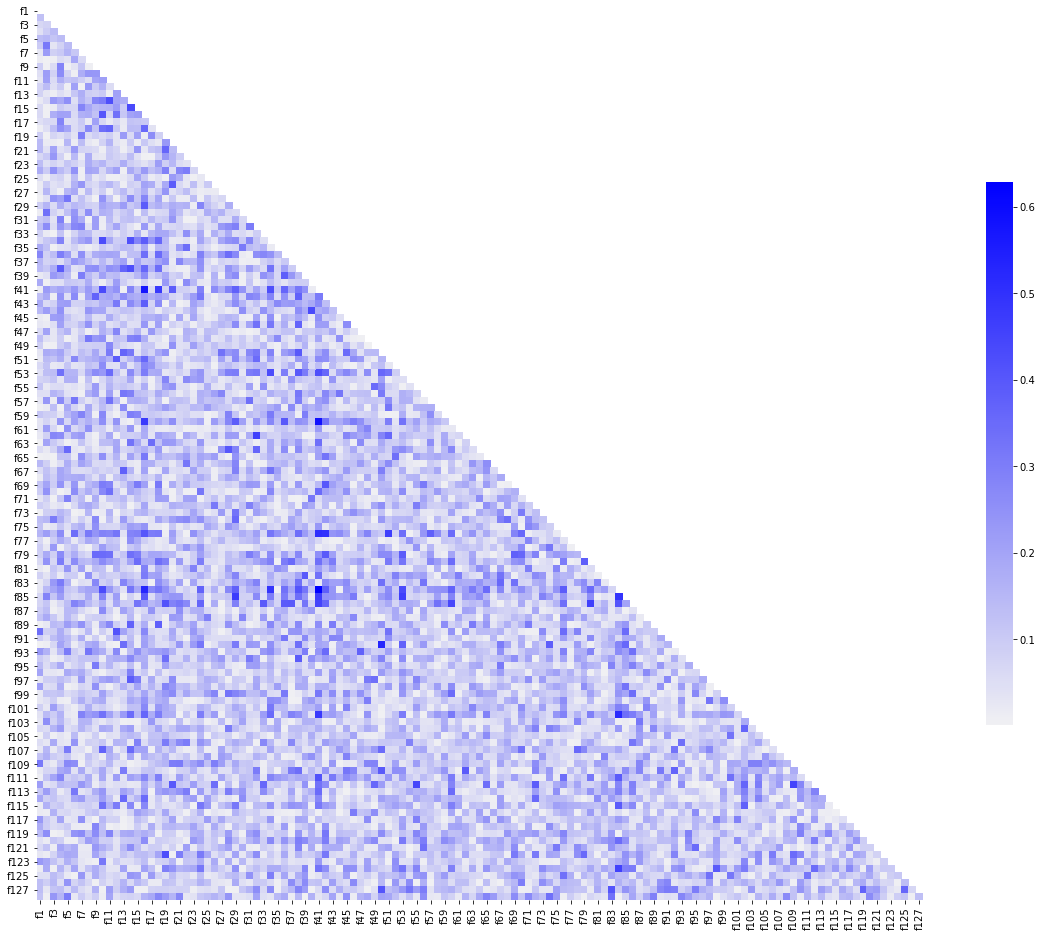

In [8]:
# Visualize feature correlations

plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr_m, cmap=cmap, square=True, cbar_kws={"shrink": .5})